# RandomForestClassifier

In [287]:
import pandas as pd #obtencion y analisis de dataframe
import matplotlib.pyplot as plt #graficos para el analisis
import seaborn as sns #graficos de calor
import warnings
warnings.filterwarnings('ignore')

In [288]:
data = pd.read_csv('muestreo_distrital.csv')
data.head()

,Programa_Academico,Numero_Matricula,Sexo,Edad,Estado_Civil,Valor_Matricula,Vive_Con_Padres,Cabeza_Familia,Num_Personas_A_Cargo,Estrato,...,Educacion_Madre,Ocupacion_Madre,Ocupacion_Padre,Pregunta1,Pregunta2,Pregunta3,Pregunta4,Pregunta5,Suma_Total,Rango_SWLS
0,Licenciatura en Educación Infantil,5,0,19,1,1,1,0,0,3,...,7,3,1,7,7,6,6,6,32,6
1,Licenciatura en Física,6,1,20,1,1,1,0,0,3,...,6,2,3,7,7,7,6,5,32,6
2,Tecnología en saneamiento ambiental,8,0,21,1,2,1,0,0,4,...,7,1,3,7,5,5,7,7,31,6
3,Licenciatura en humanidades y lengua castellana,9,1,22,1,1,1,0,0,4,...,8,3,1,6,5,7,7,6,31,6
4,Licenciatura en Ciencias Sociales,8,0,19,1,1,1,0,0,4,...,6,2,1,6,6,6,7,6,31,6


Con base a la correlación de variables, se omitiran aquellas columnas que no infieren en el resultado para entrenar el modelo.
#### Variables que NO se utilizaran
    1.Sexo
    2.Estado Civil
    3.Valor Matrícula
    4.Vive con padres
    5.Estrato
    6.Ocupacion del Padre

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 24 columns):
Programa_Academico          933 non-null object
Numero_Matricula            933 non-null int64
Sexo                        933 non-null int64
Edad                        933 non-null int64
Estado_Civil                933 non-null int64
Valor_Matricula             933 non-null int64
Vive_Con_Padres             933 non-null int64
Cabeza_Familia              933 non-null int64
Num_Personas_A_Cargo        933 non-null int64
Estrato                     933 non-null int64
Ingreso_Familiar_Mensual    933 non-null int64
Trabaja_Actualmente         933 non-null int64
Horas_Trabajadas            933 non-null int64
Educacion_Padre             933 non-null int64
Educacion_Madre             933 non-null int64
Ocupacion_Madre             933 non-null int64
Ocupacion_Padre             933 non-null int64
Pregunta1                   933 non-null int64
Pregunta2                   933 non-null int64
P

In [290]:
TrueData = data.drop(['Programa_Academico','Sexo', 'Pregunta1', 'Pregunta2', 'Pregunta3', 'Pregunta4', 'Pregunta5', 'Suma_Total'], axis='columns')

In [291]:
TrueData.head()

,Numero_Matricula,Edad,Estado_Civil,Valor_Matricula,Vive_Con_Padres,Cabeza_Familia,Num_Personas_A_Cargo,Estrato,Ingreso_Familiar_Mensual,Trabaja_Actualmente,Horas_Trabajadas,Educacion_Padre,Educacion_Madre,Ocupacion_Madre,Ocupacion_Padre,Rango_SWLS
0,5,19,1,1,1,0,0,3,4,0,0,6,7,3,1,6
1,6,20,1,1,1,0,0,3,3,0,0,7,6,2,3,6
2,8,21,1,2,1,0,0,4,3,0,0,8,7,1,3,6
3,9,22,1,1,1,0,0,4,4,0,0,8,8,3,1,6
4,8,19,1,1,1,0,0,4,5,0,0,7,6,2,1,6


Tenemos el dataset con las variables que mas infieren con el resultado, ahora miraremos la cantidad de resultados para categoria en el "Rango_SWLS"

In [292]:
one = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 1].count()
two = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 2].count()
three = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 3].count()
four = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 4].count()
five = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 5].count()
six = TrueData.Rango_SWLS[TrueData.Rango_SWLS == 6].count()

In [293]:
one, two, three, four, five, six

(131, 149, 194, 162, 150, 147)

Para crear el modelo predictivo es de necesidad partir la cantidad del dataseet, una parte de este dataset sera el que va evaluar el modelo creado.

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(TrueData.drop(['Rango_SWLS'], axis='columns'), TrueData.Rango_SWLS, test_size=0.3)

In [336]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [337]:
model.score(X_test, y_test)

0.7107142857142857

In [338]:
y_predicted = model.predict(X_test)

Text(69,0.5,'Verdadero')

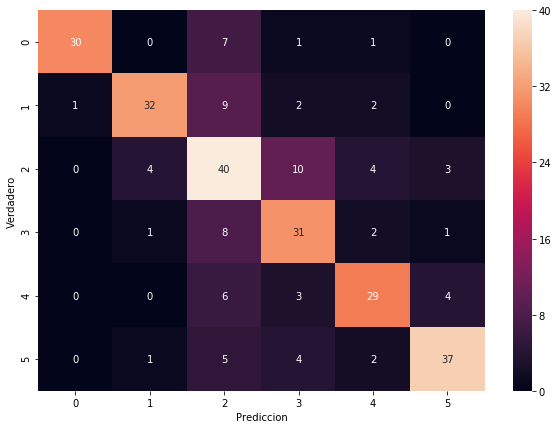

In [341]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

%matplotlib inline

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')

# k-nearest neighbors (knn)

In [328]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [329]:
knn.score(X_test, y_test)

0.6571428571428571

# Support Vector Machines (svm)

In [330]:
from sklearn.svm import SVC
mod = SVC()
mod.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [331]:
mod.score(X_test, y_test)

0.7107142857142857